# SQLite

In [ ]:
import pandas as pd
import sqlite3 as sql

#since we are looking at poems, we'll bump up the width of our columns
pd.set_option("display.max_colwidth", 250)

### Creating a connection to the poetry_kids.db database
 - tell python what database to connect to (`sql.connect( )`)
 - create a cursor to allow passing queries directly to the database

In [ ]:
conn = sql.connect('../data/poetry_kids.db')
cur = conn.cursor()

### Checking what tables exist within a database
- the cursor executes the SQL query passed to `.execute( )`
- the results of your query are loaded to the cursor
- the `fetchall()` method returns those results so you can store them in a variable

In [ ]:
# Execute tells the cursor to run the query provided

cur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")

# fetchall() allows us to see everything returned by our query, which we store in our 'available_tables' variable

available_tables = (cur.fetchall())

available_tables

Let's compare this to the **entity relationship diagram** (ERD) for this database.

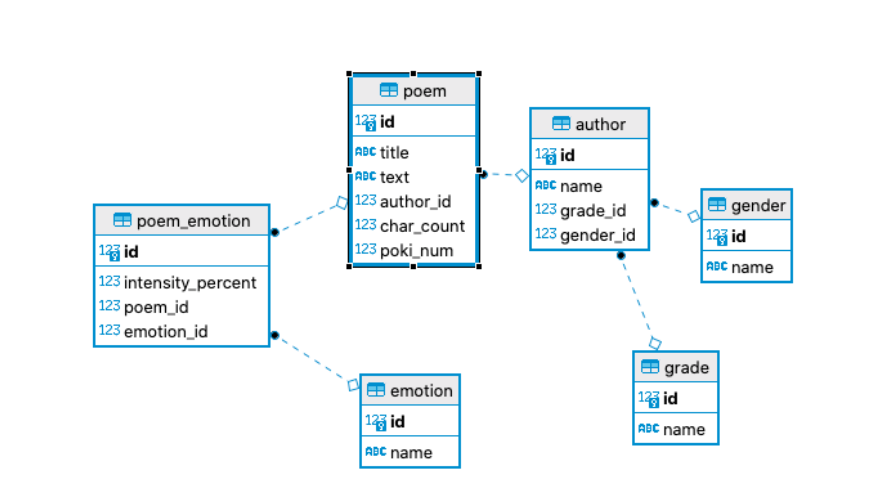

## Using Pandas to place results into a DataFrame

We can SQL queries and convert the result to a _pandas_ DataFrame by using the `read_sql` method.

When building SQL queries, it may be useful to write the query independently and save to variable. Multi-line queries can use triple quotes (''' ''') to keep it together as one string.

For example, if we want to find the very short poems, we can use the following code. 

In [ ]:
query = '''
SELECT text 
FROM poem 
WHERE char_count < 20;
'''


pd.read_sql(query, conn)

Let's now practice writing queries. Remember the process we can use:

    a. decide what tables you need   
    b. (if you need to use more than one table) decide how to connect your tables   
    c. decide which columns to select  
    d. decide what (if any) filters you want to apply in your `WHERE` clause

First, let's find the text of all poems with the title "cats".

In [ ]:
query = 
'''
SELECT 
FROM 
WHERE ;
'''

pd.read_sql(query, conn)

Now, let's see find the emotion_id associated with these poems. Keep the text of the poem, the poem_id, the emotion_id, and the intensity_percent.

Sort by the poem_id as the same poem can appear multiple times.

In [ ]:
query = 
'''
SELECT poem_id, text, emotion_id, intensity_percent
FROM poem 
JOIN poem_emotion 
ON poem.id = poem_emotion.poem_id
WHERE poem.title = 'cats'
ORDER BY poem_id;
'''

pd.read_sql(query, conn)

Let's check the number of results from the above query.

In [ ]:
query = 
'''
SELECT count(1) [cats_count]
FROM poem
LEFT JOIN poem_emotion
ON poem.id = poem_emotion.poem_id
WHERE poem.title = 'cats'
ORDER BY poem_emotion.poem_id;
'''

pd.read_sql(query, conn)

Finally, let's modify the above query to show the emotion name instead of the emotion_id. This will require joining with another table.

In [ ]:
query =
'''
SELECT 
FROM poem 
JOIN poem_emotion 
ON poem.id = poem_emotion.poem_id
JOIN 
ON = 
WHERE poem.title = 'cats'
ORDER BY poem_id;
'''

pd.read_sql(query, conn)

## Best Practice - Close connections after use to prevent the tables from being locked

In [ ]:
cur.close()
conn.close()